# Sentiment Analysis of Song Lyrics

### Kaggle data set containing lyrics from pop artists

### Original dataset: https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset

In [1]:
#loading some imports
import warnings
import pandas as pd
import numpy as np
import spacy

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

nlp = spacy.load('en_core_web_lg')

warnings.filterwarnings("ignore")


2022-10-12 12:13:52.293566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 12:13:52.584842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-12 12:13:52.584855: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-12 12:13:52.612401: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-12 12:13:53.597558: W tensorflow/stream_executor/platform/de

### Defining a function to clean the original dataframe (filter nans, empty entries, ignore live or remix songs... etc)

In [2]:
def clean_df(df):
    a = []
    i = 0
    df1 = df
    title = df['Title']
    for t in df['Title']:
        r = Re = l = Li = c = m = V = ve = D = rs = 0
        r = t.find('remix')
        Re = t.find('Remix')
        l = t.find('live')
        Li = t.find('Live')
        V = t.find('Version')
        ve = t.find('version')
        D = t.find('Demo ')
        D = t.find('Demo')
        rs = t.find('Reprise')
        c = t.find('COPY')
        m = t.find('Mix')
        if r != -1:
            a.append(t)
        elif Re != -1:
            a.append(t)
        elif l != -1:
            a.append(t)
        elif Li != -1:
            a.append(t)
        elif V != -1:
            a.append(t)
        elif ve != -1:
            a.append(t)
        elif D != -1:
            a.append(t)
        elif rs != -1:
            a.append(t)
        elif c != -1:
            a.append(t)
        elif m != -1:
            a.append(t)

    for t1 in df['Title']:
        for t2 in a:
            if t1 == t2:
                df1 = df1.drop(i)
        i = i+1

    df1.dropna(subset=["Title"], inplace=True)
    df1.dropna(subset=["Lyric"], inplace=True)
    df1.drop_duplicates(subset="Title", keep=False, inplace=True)
    df1.drop_duplicates(subset="Lyric", keep=False, inplace=True)
    none_ix = df1[df1['Year'] == 'None'].index
    df1.drop(none_ix, inplace=True)
    df1['Year'] = np.array(df1['Year'], dtype=int)
    neg_ix = df1[df1['Year'] < 1990].index
    df1.drop(neg_ix, inplace=True)

    return df1


## Loading the data as dataframes, one CSV per artist

In [3]:
import os
name_dir = 'Data/KaggleDS/'
name_artists = []
df_artists = []
for file in os.listdir(name_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(name_dir, file))
        df_artists.append(clean_df(df)) #saving the clean dataframes
        name_artists.append(file.split('.')[0]) #saving the names


### Checking name of artists and number of songs

In [4]:
n_songs = 0
for i, artist in enumerate(name_artists):
    art_songs = df_artists[i].shape[0]
    print(f'{artist}, {art_songs} lyrics.')
    n_songs += art_songs
    
print(f'\n\n Total: {n_songs} songs from {len(name_artists)} Artists')

TaylorSwift, 256 lyrics.
Drake, 307 lyrics.
NickiMinaj, 174 lyrics.
LadyGaga, 156 lyrics.
ColdPlay, 159 lyrics.
PostMalone, 95 lyrics.
SelenaGomez, 85 lyrics.
CardiB, 53 lyrics.
CharliePuth, 49 lyrics.
Rihanna, 215 lyrics.
Maroon5, 97 lyrics.
JustinBieber, 158 lyrics.
Eminem, 366 lyrics.
KatyPerry, 131 lyrics.
EdSheeran, 126 lyrics.
BillieEilish, 52 lyrics.
DuaLipa, 85 lyrics.
ArianaGrande, 164 lyrics.
Khalid, 48 lyrics.
BTS, 233 lyrics.
Beyonce, 163 lyrics.


 Total: 3172 songs from 21 Artists


## Sentiment Analysis for each song

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


### Computing the compound score with Vader and storing it as 'sentiment_score' on each artist's dataframe

In [6]:
for df in df_artists:
    df['sentiment_score'] = df['Lyric'].apply(lambda song: sid.polarity_scores(song)['compound']) 

## Example of the distributions (boxplot) for each year 

<AxesSubplot:title={'center':'LadyGaga'}, xlabel='Year', ylabel='sentiment_score'>

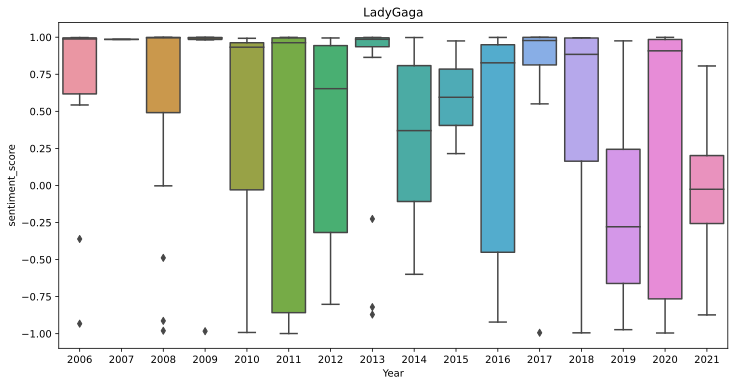

In [7]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.title(name_artists[3])
sns.boxplot(x='Year', y='sentiment_score',data=df_artists[3])

## Computing median and quartiles on each year for every artist

In [8]:
#defining function
def get_sentplotdata(cleaned_df):
     uyears = np.sort(cleaned_df['Year'].unique())
     med_sscore = [np.median(cleaned_df[cleaned_df['Year'] == year]['sentiment_score'])
          for year in uyears]
     y_errtop = [np.quantile(cleaned_df[cleaned_df['Year'] == year]['sentiment_score'],0.75) for year in uyears]
     y_errbot = [np.quantile(cleaned_df[cleaned_df['Year']==year]['sentiment_score'], 0.25) for year in uyears]
     y_err = [np.subtract(med_sscore,y_errbot),np.subtract(y_errtop, med_sscore)]

     return uyears, med_sscore, y_err

In [9]:
sentiments = [get_sentplotdata(df) for df in df_artists]

# Example for 5 different artists (randomly chosen)

Text(0, 0.5, 'Sentiment score (median)')

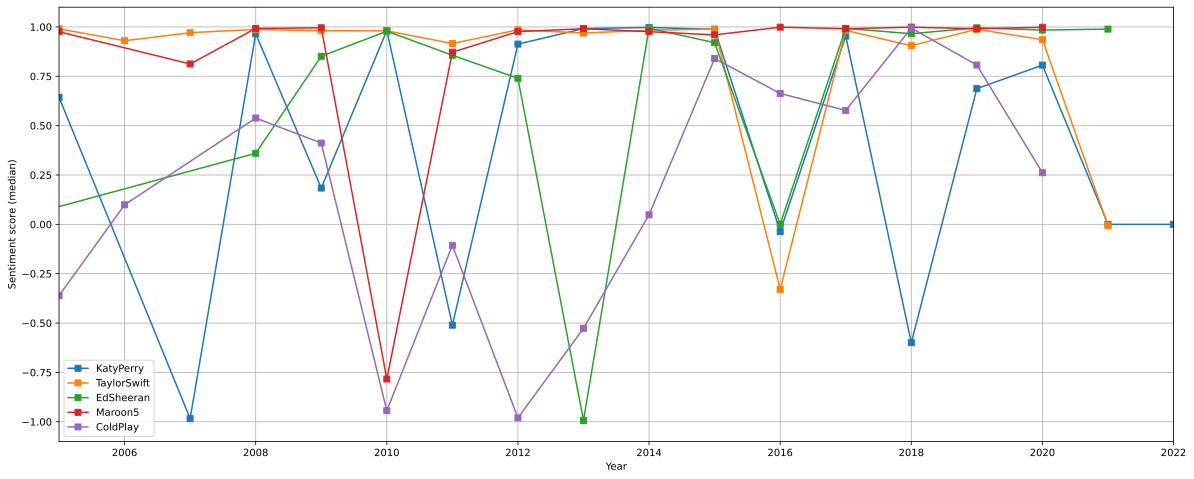

In [10]:
plt.figure(figsize=(20,8))
picks = np.random.choice(range(len(name_artists)), 5, replace=False)
for i in picks:
    plt.plot(sentiments[i][0], sentiments[i][1],'s-', label=name_artists[i])
    
plt.ylim(-1.1,1.1)
plt.xlim(2005,2022)
plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sentiment score (median)')
#plt.plot(uyears, med_sscore, linewidth=3)


# Comparing sentiment scores distributions by artist

In [11]:
#concatenating all dataframes to plot all artists with seaborn
all_df = pd.concat(df_artists)

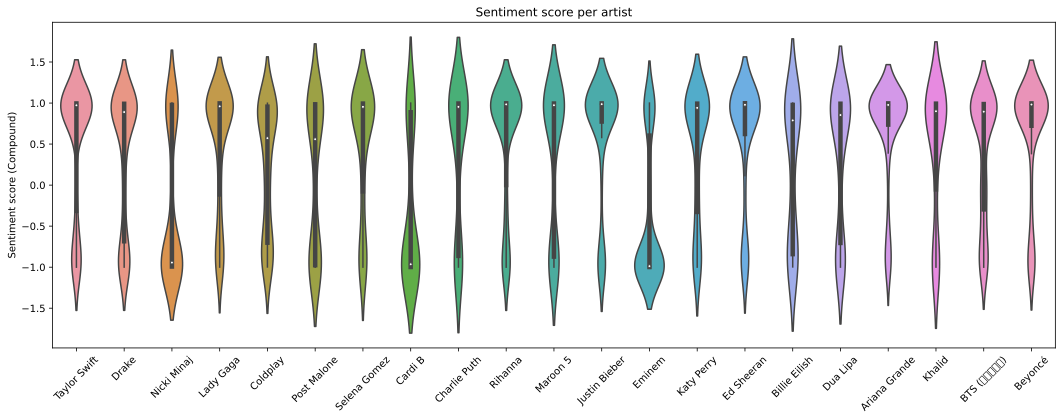

In [12]:
plt.figure(figsize=(18, 6))
plt.title('Sentiment score per artist')
sns.violinplot(x='Artist', y='sentiment_score',data=all_df)
plt.ylabel('Sentiment score (Compound)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

# Topic modeling per artist using Non-negative matrix factorization

### Loading sklearn vectorizer (with TF-IDF), removing english stopwords

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')


### Now compute the frequency matrix with the vectorizer

In [14]:
freq_mat = tfidf_vec.fit_transform(df_artists[2]['Lyric'])

### import the NMF model from sklearn, we are going to use 3 topics so we can see if there is any relationship with the sentiment previously computed

In [15]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=3)

## Fitting the model

In [16]:
nmf_model.fit(freq_mat)

NMF(n_components=3)

## Printing the top 10 words per topic

In [17]:
top_words = []
for ix, topic in enumerate(nmf_model.components_):
    print(f"The top 10 words for topic # {ix + 1 } are: \n")
    twords = [tfidf_vec.get_feature_names_out()[i]  # topic i
        for i in topic.argsort()[-10:]]
    print(twords) #sorting the components from least to most and taking the last 10
    top_words.append(twords)  
    print('\n')


The top 10 words for topic # 1 are: 

['fuck', 'em', 'minaj', 'don', 'niggas', 'know', 'bitch', 'bitches', 'nicki', 'like']


The top 10 words for topic # 2 are: 

['time', 'cause', 'ooh', 'burn', 'know', 'just', 'baby', 'come', 'yeah', 'love']


The top 10 words for topic # 3 are: 

['chance', 'met', 'gonna', 'boy', 'iii', 'super', 'got', 'bass', 'badoom', 'boom']




In [19]:
nmf_model.components_

array([[0.00800439, 0.00368752, 0.01333189, ..., 0.00355268, 0.00461401,
        0.00167581],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01980957,
        0.0016029 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00050303,
        0.        ]])

## Saving the topic number and top 10 words for each song in the artist's dataframe

In [20]:
topic_results = nmf_model.transform(freq_mat) #returns the vector of weights (probabilites) for each song on every topic
df_artists[2]['Topic'] = topic_results.argmax(axis=1)
df_artists[2]['top_words'] = df_artists[2]['Topic'].apply(lambda topic: top_words[topic])

In [21]:
topic_results

array([[2.61188393e-01, 1.26878634e-02, 0.00000000e+00],
       [6.87262635e-02, 2.00168931e-02, 2.25996783e-03],
       [1.95948504e-01, 2.49090886e-03, 2.10299360e-03],
       [1.60162326e-01, 1.36661790e-01, 0.00000000e+00],
       [1.22143303e-01, 0.00000000e+00, 1.25635445e-02],
       [1.19417153e-01, 0.00000000e+00, 0.00000000e+00],
       [1.34722364e-01, 4.26356182e-02, 8.64705251e-03],
       [1.73234330e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.92211600e-01],
       [0.00000000e+00, 3.38048549e-01, 0.00000000e+00],
       [2.16543779e-01, 2.89690021e-03, 2.80506250e-03],
       [1.41812808e-01, 1.78683529e-01, 7.05619253e-04],
       [2.45889646e-01, 0.00000000e+00, 0.00000000e+00],
       [5.69773655e-02, 2.58084375e-01, 6.96354937e-04],
       [6.39124855e-02, 8.15076928e-02, 1.34074096e-02],
       [6.50121455e-02, 6.95222149e-02, 7.82248601e-03],
       [4.64098208e-02, 1.06869631e-01, 0.00000000e+00],
       [6.44723354e-02, 2.15161

In [22]:
df_artists[2].head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,sentiment_score,Topic,top_words
0,0,Nicki Minaj,Only,The Pinkprint,2014,2014-10-28,nicki minaj yo i never fucked wayne i never fu...,-0.9985,0,"[fuck, em, minaj, don, niggas, know, bitch, bi..."
1,1,Nicki Minaj,Feeling Myself,The Pinkprint,2015,2015-05-18,nicki minaj yo b they ready let's go beyoncé...,-0.9771,0,"[fuck, em, minaj, don, niggas, know, bitch, bi..."
2,2,Nicki Minaj,Barbie Dreams,Queen (Bonus Version),2018,2018-08-10,uh mmm kyuh rip to big classic shit i'm loo...,0.9980,0,"[fuck, em, minaj, don, niggas, know, bitch, bi..."
3,3,Nicki Minaj,Truffle Butter,The Pinkprint,2015,2015-01-23,maya jane coles you know don't you yeah night ...,-0.9526,0,"[fuck, em, minaj, don, niggas, know, bitch, bi..."
4,4,Nicki Minaj,Chun-Li,Queen (Bonus Version),2018,2018-04-12,ayo look like i'm goin' for a swim dunked on '...,-0.9692,0,"[fuck, em, minaj, don, niggas, know, bitch, bi..."


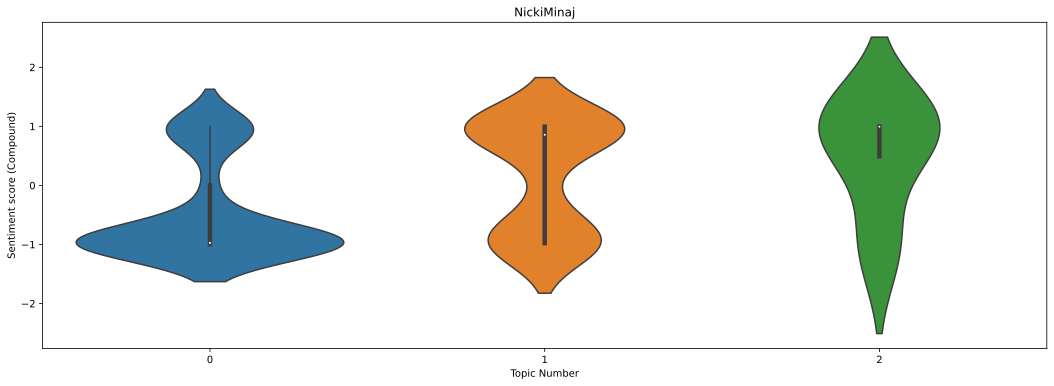

In [23]:
plt.figure(figsize=(18, 6))
plt.title(name_artists[2])
sns.violinplot(x='Topic', y='sentiment_score', data=df_artists[2])
plt.ylabel('Sentiment score (Compound)')
plt.xlabel('Topic Number')
plt.show()


# Computing the same for every artist

In [24]:
def get_topics(df_artist):
    tfidf_vec = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
    freq_mat = tfidf_vec.fit_transform(df_artist['Lyric'])
    nmf_model = NMF(n_components=3)
    nmf_model.fit(freq_mat)
    top_words = []

    for ix, topic in enumerate(nmf_model.components_):
        twords = [tfidf_vec.get_feature_names_out()[i]  # topic i
                for i in topic.argsort()[-10:]]
        top_words.append(twords)

    # returns the vector of weights (probabilites) for each song on every topic
    topic_results = nmf_model.transform(freq_mat)


    df_artist['Topic'] = topic_results.argmax(axis=1)
    df_artist['top_words'] = df_artist['Topic'].apply(lambda topic: top_words[topic])

    return df_artist


In [25]:
for df in df_artists:
    df = get_topics(df)

# Plotting the results for all artists

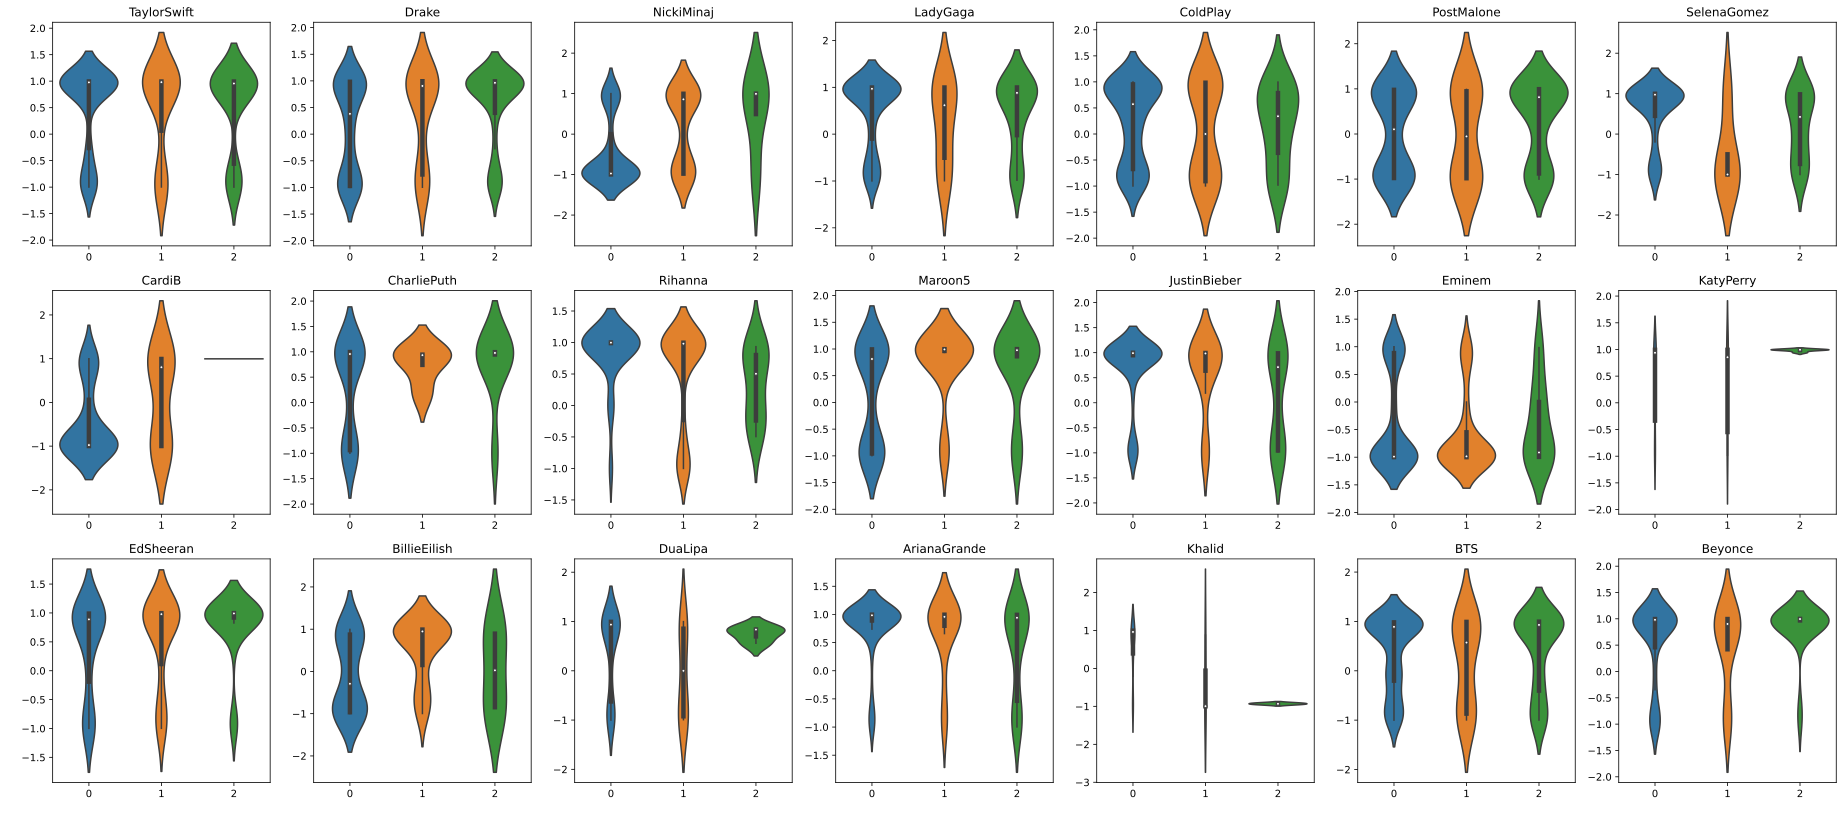

In [26]:
fig, axs = plt.subplots(3,7, figsize=(32,14))

for i,ax in enumerate(axs.flatten()):
    sns.violinplot(ax=ax, x='Topic', y='sentiment_score', data=df_artists[i])
    ax.set_title(name_artists[i])
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    

In [54]:
n_artist = 15
wordsptop = [df_artists[n_artist]
             [df_artists[n_artist]['Topic'] == topic]['top_words'].iloc[0] for topic in range(3)
]
print(f'Topics for artist {name_artists[n_artist]} \n')
for i in range(3):
    print(f'Top 10 words for topic {i}: {wordsptop[i]} \n')



Topics for artist BillieEilish 

Top 10 words for topic 0: ['bullshit', 'bad', 'wanna', 'leave', 'just', 'way', 'need', 'want', 'know', 'don'] 

Top 10 words for topic 1: ['help', 'say', 'home', 'gonna', 'know', 'just', 'lie', 'love', 'let', 'like'] 

Top 10 words for topic 2: ['sound', 'run', 'town', 'silence', 'favorite', 'make', 'em', 'crown', 'bow', 'watch'] 



False